In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\TATASTEEL.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-31,55.494999,55.779999,52.935001,55.384998,47.281101,140703330
1,2018-11-01,55.580002,56.389999,55.400002,55.660000,47.515865,54690570
2,2018-11-02,56.099998,58.240002,56.064999,57.404999,49.005539,79794570
3,2018-11-05,57.400002,58.360001,56.750000,57.744999,49.295792,45358560
4,2018-11-06,57.959999,58.439999,57.000000,57.575001,49.150665,39102740


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2023-10-23,123.349998,123.400002,119.699997,120.000000,120.000000,30699479
1231,2023-10-25,121.199997,122.800003,120.750000,121.349998,121.349998,27346103
1232,2023-10-26,120.849998,120.900002,118.900002,119.900002,119.900002,36298907
1233,2023-10-27,120.500000,121.800003,119.500000,119.900002,119.900002,28424007
1234,2023-10-30,121.050003,121.250000,118.949997,119.150002,119.150002,18753217


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1235.0,8.188623e+01,3.689123e+01,26.225000,4.647500e+01,8.852000e+01,1.139425e+02,1.519400e+02
High,1235.0,8.302787e+01,3.724750e+01,26.795000,4.719000e+01,9.065500e+01,1.157600e+02,1.534500e+02
Low,1235.0,8.059485e+01,3.638931e+01,25.084999,4.568750e+01,8.750500e+01,1.122500e+02,1.491750e+02
Close,1235.0,8.176018e+01,3.678373e+01,25.375000,4.647000e+01,8.880500e+01,1.140000e+02,1.519400e+02
Adj Close,1235.0,7.587922e+01,3.622229e+01,22.228422,4.008031e+01,8.396455e+01,1.077347e+02,1.396047e+02
Volume,1235.0,1.104945e+08,8.032488e+07,0.000000,5.343832e+07,9.146835e+07,1.426162e+08,6.428460e+08


#### Stationarity Checking

In [6]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

# perform the adf test
result = adfuller(df['Close'])

In [8]:
# Extract and print the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

ADF Statistic: -0.8002994355255146
p-value: 0.8190340948915609


In [9]:
# check for the stationarity based on p-vale
if p_value<=0.05:
    print('data is stationary')
else:
    print('data is non-stationary')

data is non-stationary


#### Model

In [10]:
#create the model
Model = ARIMA(df['Close'],order = (5,1,1))

#fit the model
result = Model.fit()

#summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1235
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2615.740
Date:                Sat, 18 Nov 2023   AIC                           5245.481
Time:                        07:23:03   BIC                           5281.307
Sample:                             0   HQIC                          5258.957
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4289      0.420      1.021      0.307      -0.395       1.252
ar.L2         -0.0258      0.025     -1.025      0.306      -0.075       0.024
ar.L3         -0.0618      0.025     -2.453      0.014      -0.111      -0.012
ar.L4          0.0783      0.032      2.473      0.013       0.016       0.140
ar.L5         -0.0623      0.024     -2.616      0.009      -0.109      -0.016
ma.L1         -0.3900      0.423     -0.923      0.356      -1.218       0.438
sigma2         4.0615      0.089     45.869      0.000       3.888       4.235
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2587.60
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prediction

In [11]:
df['Forecast'] = result.predict(start = 0,end = len(df)-1)

In [12]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Forecast
1225,2023-10-16,125.099998,127.250000,124.949997,127.000000,127.000000,23868700,125.188507
1226,2023-10-17,127.900002,128.550003,127.000000,127.400002,127.400002,24241710,126.975470
1227,2023-10-18,127.849998,128.699997,126.599998,127.099998,127.099998,20926079,127.504520
1228,2023-10-19,125.500000,126.500000,124.349998,126.000000,126.000000,30941319,126.872505
1229,2023-10-20,125.000000,125.750000,122.699997,123.099998,123.099998,30746140,126.057147
1230,2023-10-23,123.349998,123.400002,119.699997,120.000000,120.000000,30699479,122.966119
1231,2023-10-25,121.199997,122.800003,120.750000,121.349998,121.349998,27346103,119.921327
1232,2023-10-26,120.849998,120.900002,118.900002,119.900002,119.900002,36298907,121.563514
1233,2023-10-27,120.500000,121.800003,119.500000,119.900002,119.900002,28424007,119.924843
1234,2023-10-30,121.050003,121.250000,118.949997,119.150002,119.150002,18753217,119.801313


#### Plot

In [13]:
x = df['Date'][-30:]
y1 = df['Close'][-30:]
y2 = df['Forecast'][-30:]

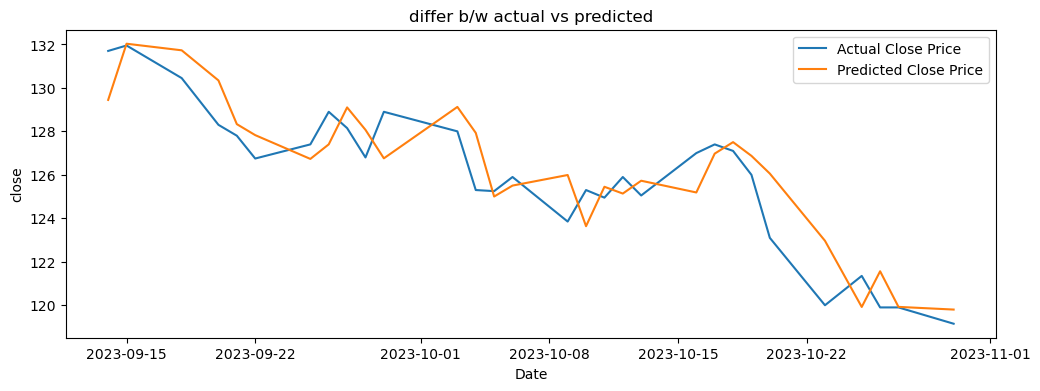

In [14]:
plt.figure(figsize = (12,4))
plt.plot(x,y1,label = 'Actual Close Price')
plt.plot(x,y2,label = 'Predicted Close Price')
plt.legend()
plt.xticks()
plt.xlabel('Date')
plt.ylabel('close')
plt.title('differ b/w actual vs predicted')
plt.show()